<a href="https://colab.research.google.com/github/amomen1218/Earth-Data-Analytics/blob/main/Landsat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with Landsat Data**

In [19]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
!pip install earthpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

!pip install rioxarray
import rioxarray as rxr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00


In [20]:
landsat_post_fire_path = "/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop"

In [21]:
post_fire_paths = glob(os.path.join(landsat_post_fire_path, "*band*.tif"))
post_fire_paths.sort()
post_fire_paths

['/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 '/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 '/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 '/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 '/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 '/content/drive/MyDrive/Earth data Analytics/All_data/landsat_collect/LC080340322016072301T1-SC20180214145802/crop

In [22]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked = True)
band_1.shape

(1, 177, 246)

In [30]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked = True).squeeze()
band_1.shape #Open a single band using squeeze notice there are only 2 dimensions here

(177, 246)

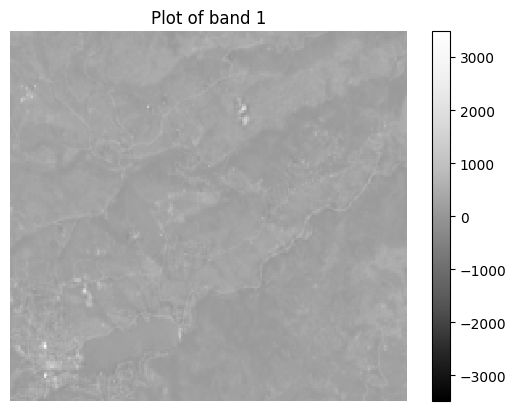

In [31]:
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax, cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of band 1")
plt.show()


In [34]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [40]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1


In [41]:
landsat_post_fire_xr = xr.concat(all_bands, dim="band")
landsat_post_fire_xr #Turn list of bands into a single xarray object

<xarray.DataArray (band: 7, y: 177, x: 246)> Size: 1MB
array([[[ 446.,  476.,  487., ...,  162.,  220.,  260.],
        [ 393.,  457.,  488., ...,  200.,  235.,  296.],
        [ 364.,  393.,  388., ...,  246.,  298.,  347.],
        ...,
        [ 249.,  283.,  363., ...,  272.,  268.,  284.],
        [ 541.,  474.,  364., ...,  260.,  269.,  285.],
        [ 219.,  177.,  250., ...,  271.,  271.,  286.]],

       [[ 515.,  547.,  572., ...,  181.,  233.,  261.],
        [ 440.,  519.,  571., ...,  211.,  251.,  322.],
        [ 411.,  460.,  449., ...,  264.,  326.,  387.],
        ...,
        [ 387.,  326.,  427., ...,  288.,  278.,  301.],
        [ 554.,  654.,  433., ...,  276.,  276.,  293.],
        [ 291.,  174.,  291., ...,  292.,  290.,  304.]],

       [[ 782.,  772.,  843., ...,  335.,  390.,  411.],
        [ 684.,  771.,  836., ...,  363.,  412.,  511.],
        [ 656.,  725.,  706., ...,  425.,  518.,  599.],
        ...,
...
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 56B 1 2 3 4 5 6 7
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

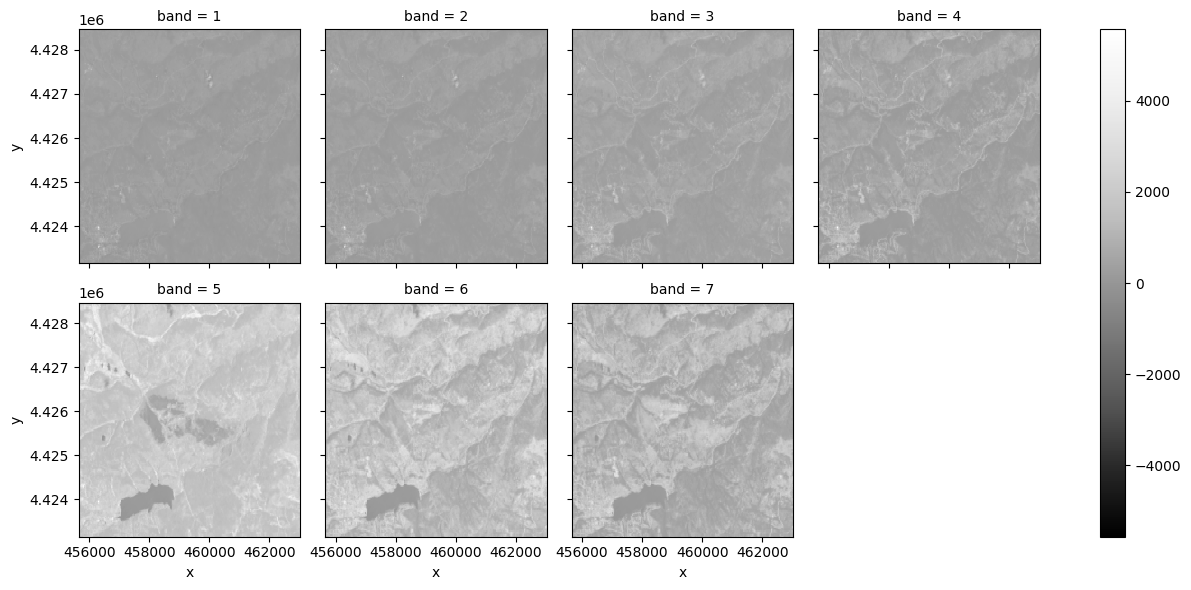

In [43]:
landsat_post_fire_xr.plot.imshow(col= 'band', col_wrap=4, cmap="Greys_r")
plt.show()

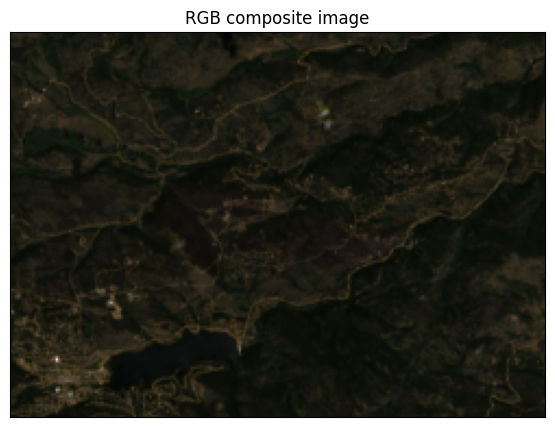

<Axes: title={'center': 'RGB composite image'}>

In [63]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb= [3,2,1],
            title= "RGB composite image",
            figsize=(10,5))

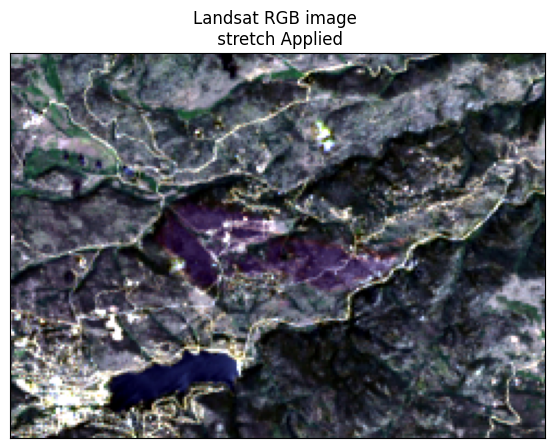

In [62]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb= [3,2,1,],
            title= "Landsat RGB image \n stretch Applied",
            stretch=True,
            figsize=(10,5),
            str_clip=1) #you can change the brightness by changing str_clip value
plt.show()

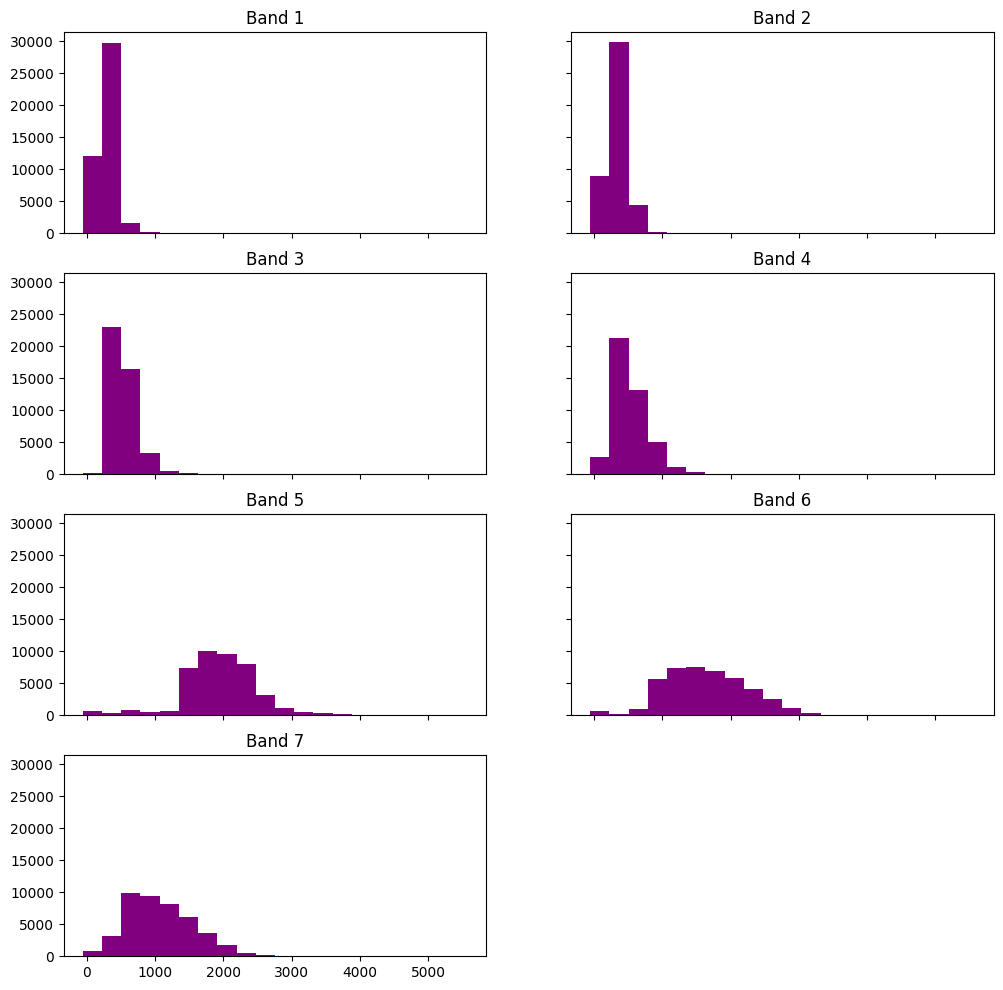

In [70]:
band_title = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 5", "Band 6", "Band 7"]
ep.hist(landsat_post_fire_xr.values,
        title= band_title)
plt.show()

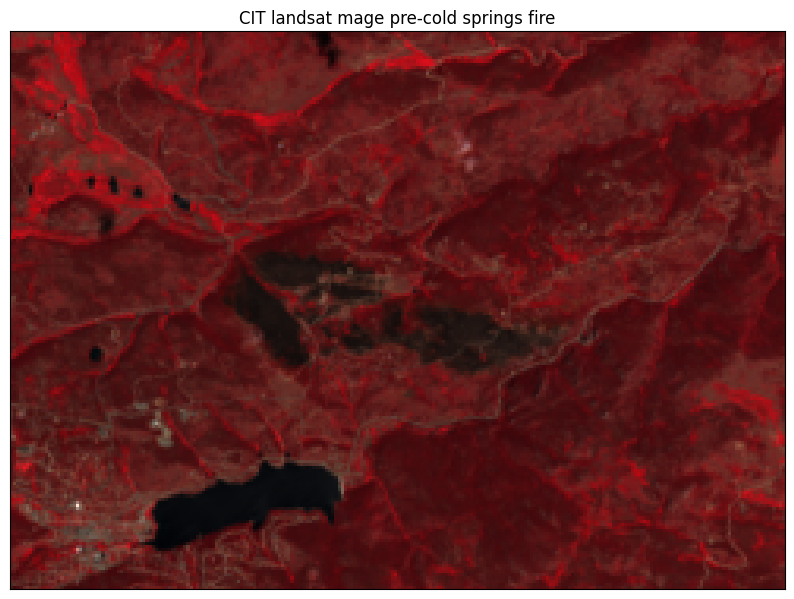

In [75]:
ep.plot_rgb(landsat_post_fire_xr.values,
              rgb=[4,3,2],
              title="CIT landsat mage pre-cold springs fire", figsize=(10,10))
plt.show()